<a href="https://colab.research.google.com/github/manuelpope/DsPalermoPractica/blob/master/kickstarter2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime

In [ ]:
import matplotlib

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kickclenaed.csv") 

In [ ]:
data.tail(20)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged\n
298215,999880710,Terminal Uniqueness,Nonfiction,Publishing,USD,2014-08-15 02:10:39,5000.0,2014-07-15 02:10:39,18.00,failed,5,US,18.000000
298216,999884445,Superette Tea - Boldly Caffeinated Loose Leaf Tea,Drinks,Food,USD,2015-12-03 13:04:14,5000.0,2015-11-03 13:04:14,5579.00,successful,103,US,5579.000000
298217,999893629,Ciridian Helix (Canceled),Fiction,Publishing,USD,2014-09-11 21:33:00,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US,100.000000
298218,99991751,Here is the oasis for the youngest in the world.,Product Design,Design,CHF,2015-09-04 18:00:47,80000.0,2015-07-06 18:00:47,0.00,failed,0,CH,0.000000
298219,999931480,Google Glass Shield (Canceled),3D Printing,Technology,USD,2014-05-26 20:22:45,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US,0.000000
298220,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15 06:59:00,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US,6169.000000
298221,999941823,The Chronicles of Erinoth - A Graphic Novel,Comics,Comics,GBP,2013-10-10 22:45:26,16000.0,2013-09-10 22:45:26,2738.00,failed,38,GB,4281.148573
298222,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30 19:03:00,950.0,2013-10-18 21:35:04,1732.02,successful,31,US,1732.020000
298223,999950812,The Cease is Increase,Nonfiction,Publishing,USD,2012-09-14 17:11:00,4999.0,2012-08-15 17:11:00,980.00,failed,16,US,980.000000
298224,999955533,Cards and Chit Network Season 2! (Canceled),Tabletop Games,Games,USD,2016-02-23 16:03:27,500.0,2016-01-24 16:03:27,121.00,canceled,5,US,121.000000


In [ ]:
data.count()


ID                298235
name              298231
category          298235
main_category     298235
currency          298235
deadline          298235
goal              298235
launched          298235
pledged           298235
state             298235
backers           298235
country           298235
usd pledged\n     298235
dtype: int64

In [ ]:
data.describe()

,ID,goal,pledged,backers,usd pledged\n
count,2.982350e+05,2.982350e+05,2.982350e+05,298235.000000,2.982350e+05
mean,1.074803e+09,4.691901e+04,8.542883e+03,101.437353,7.630986e+03
std,6.191766e+08,1.119206e+06,7.908841e+04,920.575616,7.362505e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,5.379130e+08,2.000000e+03,2.800000e+01,2.000000,2.500000e+01
50%,1.076021e+09,5.000000e+03,5.900000e+02,12.000000,5.170000e+02
75%,1.610588e+09,1.500000e+04,3.828505e+03,55.000000,3.507899e+03
max,2.147476e+09,1.000000e+08,1.328523e+07,219382.000000,1.328523e+07


In [ ]:
missingValues = data.isnull().sum()

In [ ]:
missingValues

ID                0
name              4
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged\n     0
dtype: int64

In [ ]:
total_cells = np.product(data.shape)
total_missing = missingValues.sum()

In [ ]:
total_missing

4

In [ ]:
(total_missing/total_cells) * 100 # Cantidad total de missing Values de todos los registros

0.00010317109249159478

In [ ]:
dataNoneMissingValues = data.dropna()

In [ ]:
missingValues = dataNoneMissingValues.isnull().sum()

In [ ]:
missingValues, dataNoneMissingValues.count()

(ID                0
 name              0
 category          0
 main_category     0
 currency          0
 deadline          0
 goal              0
 launched          0
 pledged           0
 state             0
 backers           0
 country           0
 usd pledged\n     0
 dtype: int64, ID                298231
 name              298231
 category          298231
 main_category     298231
 currency          298231
 deadline          298231
 goal              298231
 launched          298231
 pledged           298231
 state             298231
 backers           298231
 country           298231
 usd pledged\n     298231
 dtype: int64)

In [ ]:
dataNoneMissingValues.head(15)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged\n
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00


In [ ]:
dataNoneMissingValues.dtypes

ID                  int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal              float64
launched           object
pledged           float64
state              object
backers             int64
country            object
usd pledged\n     float64
dtype: object

In [ ]:
listHeaders =dataNoneMissingValues.columns
listHeaders=list(listHeaders)

In [ ]:
headers = [index.lstrip().rstrip() for index in listHeaders]

In [ ]:
headers

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged']

In [ ]:
dataNoneMissingValues.columns=headers

In [ ]:
data = dataNoneMissingValues.set_index('usd pledged')

In [ ]:
data.dtypes

ID                 int64
name              object
category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
pledged          float64
state             object
backers            int64
country           object
dtype: object

In [ ]:
data.sort_index(ascending=False)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
usd pledged,,,,,,,,,,,,
13285226.36,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30 03:00:00,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US
10266845.74,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19 05:00:00,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US
9192055.66,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03 19:00:00,20000.0,2015-07-07 13:52:34,9192055.66,successful,44949,US
8782571.99,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20 03:00:00,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US
8596474.58,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09 07:00:00,950000.0,2012-07-10 14:44:41,8596474.58,successful,63416,US
...,...,...,...,...,...,...,...,...,...,...,...,...
0.00,414397394,Nicole and Tiffany's masterpiece (Canceled),Events,Food,USD,2015-09-08 01:10:40,400000.0,2015-08-09 01:10:40,0.00,canceled,0,US
0.00,1232226628,Global Angler & Global Angler Junior Board Gam...,Tabletop Games,Games,AUD,2014-09-23 10:41:26,69000.0,2014-08-24 10:41:26,0.00,canceled,0,AU
0.00,764673153,Pacific Grove: a new play about John Steinbeck...,Theater,Theater,USD,2010-09-09 19:57:39,5000.0,2010-08-10 19:57:39,0.00,failed,0,US


In [ ]:
data = data.reset_index()

In [ ]:
data.head()

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,0.0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB
1,220.0,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US
2,1.0,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US
3,1283.0,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US
4,52375.0,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US


In [ ]:
failedList =  data.query("state == 'failed' & currency =='USD'")

In [ ]:
len(failedList)

125001

In [ ]:
failedList.sort_values(by=["goal"],ascending=False).head(20)

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
43464,13.0,1279992058,Kybernan Holographic Gaming Network,Video Games,Games,USD,2016-01-01 06:59:00,100000000.0,2015-11-07 00:57:17,13.0,failed,4,US
167612,56.0,2083255961,A Billion Pixels...,Web,Technology,USD,2014-08-04 23:39:34,100000000.0,2014-06-05 23:39:34,56.0,failed,6,US
204348,1.0,388031956,UniqueTrends,Apparel,Fashion,USD,2015-03-04 23:52:25,100000000.0,2015-02-02 23:52:25,1.0,failed,1,US
266630,3577.0,794141191,Robotech Take Over,Fiction,Publishing,USD,2014-08-31 20:06:07,100000000.0,2014-08-01 20:06:07,3577.0,failed,27,US
61369,2.0,1395179504,Bring back Pontiac,Technology,Technology,USD,2016-04-01 13:39:08,100000000.0,2016-02-01 13:39:08,2.0,failed,2,US
125077,1.0,1806062709,The Return Of The Bell Witch Movie,Shorts,Film & Video,USD,2014-05-09 18:59:51,100000000.0,2014-04-09 18:59:51,1.0,failed,1,US
292578,0.0,962949560,"""""""PG"""" Reanimated Cartoons Tha Movie""",Animation,Film & Video,USD,2015-04-11 23:48:13,100000000.0,2015-02-10 23:49:30,0.0,failed,0,US
57668,0.0,1371612630,Wax Apple,Documentary,Film & Video,USD,2014-12-17 16:00:00,100000000.0,2014-12-16 15:43:58,0.0,failed,0,US
126542,0.0,1815288309,The Book on Comedy 10 GABAGILLTRILLBILLIOPLEXI...,Comics,Comics,USD,2014-10-11 21:27:50,100000000.0,2014-08-12 21:27:50,0.0,failed,0,US
169359,0.0,2094346154,Is Anyone Out There ?,Technology,Technology,USD,2015-08-01 19:21:34,100000000.0,2015-06-02 19:21:34,0.0,failed,0,US


In [ ]:
data[data.ID.isin([2083255961,812654701])]

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
167612,56.0,2083255961,A Billion Pixels...,Web,Technology,USD,2014-08-04 23:39:34,100000000.0,2014-06-05 23:39:34,56.0,failed,6,US
269443,15.0,812654701,Fund My Film - life.,Shorts,Film & Video,USD,2015-08-27 00:05:18,50000000.0,2015-07-28 00:05:18,15.0,failed,3,US


In [ ]:
data.tail()

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
298226,25.0,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US
298227,155.0,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500.0,2011-06-22 03:35:14,155.0,failed,5,US
298228,20.0,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000.0,2010-07-01 19:40:30,20.0,failed,1,US
298229,200.0,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000.0,2016-01-13 18:13:53,200.0,failed,6,US
298230,524.0,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16 09:07:47,2000.0,2011-07-19 09:07:47,524.0,failed,17,US


In [ ]:
#seleccion_data = data.sort_values(by = ['columnA','colB'], ascending=[True, false])--- por si acaso
#ANALISIS EXPLOTARIOS DE DATOS


In [ ]:
data.state.value_counts()

failed        157444
successful    105031
canceled       30268
live            4110
suspended       1378
Name: state, dtype: int64

In [ ]:
data[data.duplicated()].count()

usd pledged      0
ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
dtype: int64

In [ ]:
columnsCategoricals=['main_category','currency','state','country']
for col in columnsCategoricals:
    print(data[col].value_counts(normalize=True))

Film & Video    0.181088
Music           0.139972
Publishing      0.103507
Games           0.088552
Technology      0.080991
Art             0.075059
Design          0.073037
Food            0.065547
Fashion         0.057710
Theater         0.030802
Photography     0.030285
Comics          0.027703
Crafts          0.022399
Journalism      0.012775
Dance           0.010572
Name: main_category, dtype: float64
USD    0.805587
GBP    0.087147
CAD    0.037870
EUR    0.035020
AUD    0.019669
SEK    0.004051
NZD    0.003598
DKK    0.002619
NOK    0.001653
CHF    0.001432
MXN    0.000677
SGD    0.000365
HKD    0.000312
Name: currency, dtype: float64
failed        0.527926
successful    0.352180
canceled      0.101492
live          0.013781
suspended     0.004621
Name: state, dtype: float64
US    0.805587
GB    0.087147
CA    0.037870
AU    0.019669
DE    0.008436
NL    0.006901
FR    0.005751
IT    0.005338
ES    0.004272
SE    0.004051
NZ    0.003598
DK    0.002619
IE    0.001767
NO    0.0016

In [ ]:
data.drop(data[data.state == "live"].index, inplace=True)
#elimino los que siguen en camino por que no tengo dato de que paso con ellos

In [ ]:
data['state'].value_counts(normalize=True), data.count()

(failed        0.535303
 successful    0.357101
 canceled      0.102910
 suspended     0.004685
 Name: state, dtype: float64, usd pledged      294121
 ID               294121
 name             294121
 category         294121
 main_category    294121
 currency         294121
 deadline         294121
 goal             294121
 launched         294121
 pledged          294121
 state            294121
 backers          294121
 country          294121
 dtype: int64)

In [ ]:
def outliers(data):
    for columna in data:
        if data[columna].dtype!= np.object:
            nOutliers= len(data[np.abs(stats.zscore(data[columna]))>3])
            print("{}|{}|{}".format(data[columna].name,nOutliers,data[columna].dtype))
        

In [ ]:
outliers(data)

usd pledged|1111|float64
ID|0|int64
goal|313|float64
pledged|1257|float64
backers|1195|int64


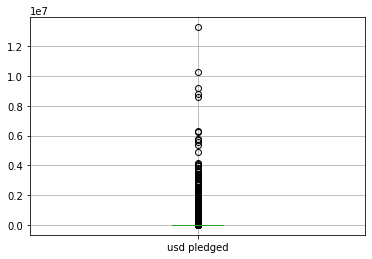

In [ ]:
data.boxplot(column='usd pledged');

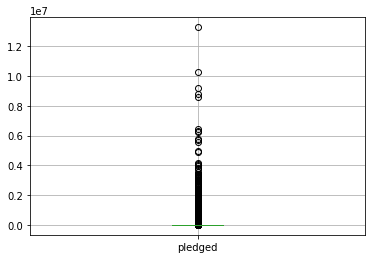

In [ ]:
data.boxplot(column='pledged');

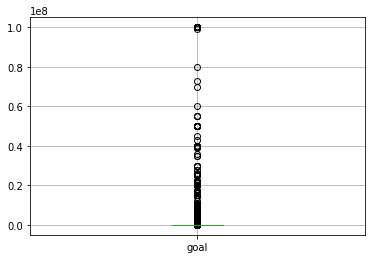

In [ ]:
data.boxplot(column='goal');

In [ ]:
data.tail(20)

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
298211,18.000000,999880710,Terminal Uniqueness,Nonfiction,Publishing,USD,2014-08-15 02:10:39,5000.0,2014-07-15 02:10:39,18.00,failed,5,US
298212,5579.000000,999884445,Superette Tea - Boldly Caffeinated Loose Leaf Tea,Drinks,Food,USD,2015-12-03 13:04:14,5000.0,2015-11-03 13:04:14,5579.00,successful,103,US
298213,100.000000,999893629,Ciridian Helix (Canceled),Fiction,Publishing,USD,2014-09-11 21:33:00,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US
298214,0.000000,99991751,Here is the oasis for the youngest in the world.,Product Design,Design,CHF,2015-09-04 18:00:47,80000.0,2015-07-06 18:00:47,0.00,failed,0,CH
298215,0.000000,999931480,Google Glass Shield (Canceled),3D Printing,Technology,USD,2014-05-26 20:22:45,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US
298216,6169.000000,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15 06:59:00,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US
298217,4281.148573,999941823,The Chronicles of Erinoth - A Graphic Novel,Comics,Comics,GBP,2013-10-10 22:45:26,16000.0,2013-09-10 22:45:26,2738.00,failed,38,GB
298218,1732.020000,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30 19:03:00,950.0,2013-10-18 21:35:04,1732.02,successful,31,US
298219,980.000000,999950812,The Cease is Increase,Nonfiction,Publishing,USD,2012-09-14 17:11:00,4999.0,2012-08-15 17:11:00,980.00,failed,16,US
298220,121.000000,999955533,Cards and Chit Network Season 2! (Canceled),Tabletop Games,Games,USD,2016-02-23 16:03:27,500.0,2016-01-24 16:03:27,121.00,canceled,5,US


In [ ]:
data['state'].describe()

count     294121
unique         4
top       failed
freq      157444
Name: state, dtype: object

In [ ]:
listS= data['state']
list_sp= listS.str.contains('successful')
list_sp.describe()
data['success']= np.where(list_sp,1,0)

In [ ]:
data.head(10)

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,success
0,0.00,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0
1,220.00,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,0
2,1.00,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,0
3,1283.00,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,0
4,52375.00,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,1
5,1205.00,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1
6,453.00,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,0
7,8233.00,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,0
8,6240.57,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,0
9,0.00,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0


In [ ]:
data['launched'] = data['launched'].astype('datetime64[ns]')
data['deadline'] = data['deadline'].astype('datetime64[ns]')

In [ ]:
data.dtypes

usd pledged             float64
ID                        int64
name                     object
category                 object
main_category            object
currency                 object
deadline         datetime64[ns]
goal                    float64
launched         datetime64[ns]
pledged                 float64
state                    object
backers                   int64
country                  object
success                   int64
dtype: object

In [ ]:
curList = list(data['currency'].unique())
dictCur={}
dictCur['GBP']= 1.24
dictCur['USD']= 1
dictCur['CAD']= 0.74
dictCur['NOK']= 0.10
dictCur['AUD']= 1.69
dictCur['EUR']= 1.12
dictCur['SEK']= 1.11
dictCur['CHF']= 1.05
dictCur['DKK']= 0.15
dictCur['NZD']= 0.64
dictCur['HKD']= 0.13
dictCur['SGD']= 0.72
dictCur['MXN']= 0.044
print(len(dictCur),len(curList))
# para normalizar todo en usd y tenermontos mas acordes.
# columna nueva con monto en USD



13 13


In [ ]:
def currencyExchange(data, columna, dictCur):
    listUsdValues = []
    for i in range(0,len(data)):
        value= dictCur.get(data['currency'].iloc[i])*data[columna].iloc[i]
        listUsdValues.append(value)
        
    return listUsdValues

data['inUSDGoal']= currencyExchange(data, 'goal',dictCur)
data['inUSDPledged']= currencyExchange(data, 'pledged',dictCur)
        

In [ ]:
data.head(15)

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,success,inUSDGoal,inUSDPledged
0,0.00,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0,1240.0,0.00
1,220.00,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,0,45000.0,220.00
2,1.00,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,0,5000.0,1.00
3,1283.00,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,0,19500.0,1283.00
4,52375.00,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,1,50000.0,52375.00
5,1205.00,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1,1000.0,1205.00
6,453.00,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,0,25000.0,453.00
7,8233.00,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,0,125000.0,8233.00
8,6240.57,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,0,65000.0,6240.57
9,0.00,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0,1850.0,0.00


In [ ]:
pd.crosstab(index=data['main_category'],columns=data['success'])

success,0,1
main_category,,
Art,13179,8969
Comics,3910,4243
Crafts,5035,1509
Dance,1164,1959
Design,14050,7241
Fashion,12923,3981
Film & Video,33214,20316
Food,14547,4750
Games,17151,8823


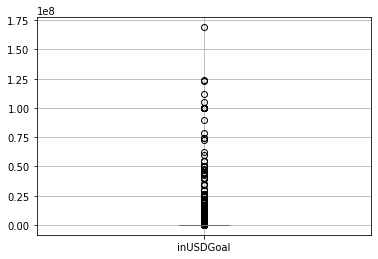

In [ ]:
data.boxplot(column='inUSDGoal');

In [ ]:
pd.crosstab(index=data['backers'],columns=data['success'])

success,0,1
backers,,
0,41923,0
1,26927,284
2,17857,285
3,12217,337
4,9030,360
...,...,...
85581,0,1
87142,0,1
91585,0,1


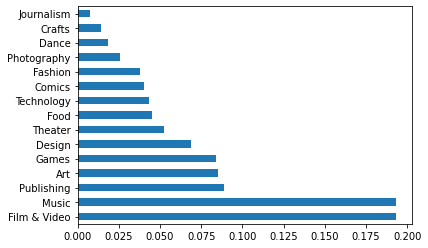

In [ ]:
dataMsuccess =data.query("success == 1")
dataMsuccess.describe()
dataMsuccess.main_category.value_counts(normalize=True).plot.barh();
#distribucion de los exitosos 

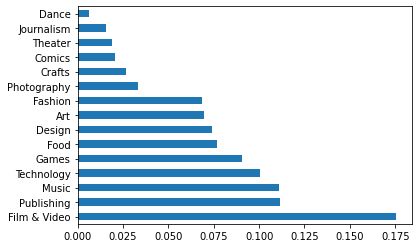

In [ ]:
dataMsuccess =data.query("success == 0")
dataMsuccess.head()
dataMsuccess.main_category.value_counts(normalize=True).plot.barh();
#distribucion de los fracasos 

In [ ]:
dataMsuccess.main_category.value_counts(normalize=True)

Film & Video    0.175652
Publishing      0.111587
Music           0.111143
Technology      0.100444
Games           0.090703
Food            0.076932
Design          0.074303
Art             0.069697
Fashion         0.068343
Photography     0.033079
Crafts          0.026628
Comics          0.020678
Theater         0.019086
Journalism      0.015569
Dance           0.006156
Name: main_category, dtype: float64

In [ ]:
n_records = len(data)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*n_records),3),
            round(menos_comun / (1.0*n_records),3),
            df[columna].dtype
        ))
valores_duplicados_col(data)

usd pledged | 0.157-0.0 | float64
ID | 0.0-0.0 | int64
name | 0.0-0.0 | object
category | 0.052-0.0 | object
main_category | 0.182-0.011 | object
currency | 0.808-0.0 | object
deadline | 0.0-0.0 | datetime64[ns]
goal | 0.078-0.0 | float64
launched | 0.0-0.0 | datetime64[ns]
pledged | 0.143-0.0 | float64
state | 0.535-0.005 | object
backers | 0.143-0.0 | int64
country | 0.808-0.0 | object
success | 0.643-0.357 | int64
inUSDGoal | 0.065-0.0 | float64
inUSDPledged | 0.143-0.0 | float64


In [ ]:
#calculo del gap de tiempo , nos intersa ver cual es lifespan 
data.head()
data['gap']= data['deadline']-data['launched']
data['gap']=data['gap'].dt.days
data.head()

,usd pledged,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,success,inUSDGoal,inUSDPledged,gap
0,0.0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0,1240.0,0.0,58
1,220.0,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,0,45000.0,220.0,45
2,1.0,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,0,5000.0,1.0,30
3,1283.0,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,0,19500.0,1283.0,55
4,52375.0,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,1,50000.0,52375.0,35


In [ ]:
#No hay probelmas con los valores  duplicados y proceguimos a eliminar  columnas que no traen informacion
# o ya fueron transformadas
data.drop(columns=['currency', 'goal','pledged','state','usd pledged'])

,ID,name,category,main_category,deadline,launched,backers,country,success,inUSDGoal,inUSDPledged,gap
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09 11:36:00,2015-08-11 12:12:28,0,GB,0,1240.0,0.0,58
1,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26 00:20:50,2013-01-12 00:20:50,3,US,0,45000.0,220.0,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16 04:24:11,2012-03-17 03:24:11,1,US,0,5000.0,1.0,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29 01:00:00,2015-07-04 08:35:03,14,US,0,19500.0,1283.0,55
4,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01 13:38:27,2016-02-26 13:38:27,224,US,1,50000.0,52375.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...
298226,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17 02:35:30,2014-09-17 02:35:30,1,US,0,50000.0,25.0,30
298227,999977640,The Tribe,Narrative Film,Film & Video,2011-07-19 03:35:14,2011-06-22 03:35:14,5,US,0,1500.0,155.0,27
298228,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16 05:59:00,2010-07-01 19:40:30,1,US,0,15000.0,20.0,45
298229,999987933,BioDefense Education Kit,Technology,Technology,2016-02-13 02:00:00,2016-01-13 18:13:53,6,US,0,15000.0,200.0,30


In [ ]:
data['inUSDGoal'].describe()


count    2.941210e+05
mean     4.736908e+04
std      1.149142e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.400000e+03
75%      1.521900e+04
max      1.690000e+08
Name: inUSDGoal, dtype: float64

In [ ]:
data['category'].describe()

count             294121
unique               158
top       Product Design
freq               15403
Name: category, dtype: object

In [ ]:
aimRange = ['muy pequeño',"pequeño",  "mediano", "grande", "muy grande"]
data['range'] = pd.qcut(data['inUSDGoal'],
                                  5, aimRange)
data['range'].describe()

count          294121
unique              5
top       muy pequeño
freq            62940
Name: range, dtype: object

In [ ]:
#sm = scatter_matrix(data,alpha=0.2,diagonal='kde')

In [ ]:
data['range'].value_counts(normalize=True)


muy pequeño    0.213994
grande         0.201070
muy grande     0.198323
pequeño        0.197657
mediano        0.188956
Name: range, dtype: float64

In [ ]:
#exportar resultados a csv

In [ ]:
data[data['ID'].duplicated()].count()
data.set_index('ID')

,usd pledged,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,success,inUSDGoal,inUSDPledged,gap,range
ID,,,,,,,,,,,,,,,,,
1000002330,0.0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0,1240.0,0.0,58,muy pequeño
1000004038,220.0,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,0,45000.0,220.0,45,muy grande
1000007540,1.0,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,0,5000.0,1.0,30,mediano
1000011046,1283.0,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,0,19500.0,1283.0,55,grande
1000014025,52375.0,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,1,50000.0,52375.0,35,muy grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,25.0,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,0,50000.0,25.0,30,muy grande
999977640,155.0,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,0,1500.0,155.0,27,muy pequeño
999986353,20.0,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,0,15000.0,20.0,45,grande


In [ ]:
data.to_csv("/content/drive/My Drive/Colab Notebooks/cleanDatavfromColab.csv")